In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/titanic-passengers.csv', sep=';')
#values that  can't impact the passenger chance to survive ? 
# name , cabin , 
# cabin has only 204 vals
drops = ['Ticket', 'Cabin','Embarked']
df = df.drop(drops, axis=1)
#-----------------------------------#
# age has a lot of na , we need to convert sex , survived into num values 
#___________________________________#
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df['Sex'].replace(['female','male'],[0,1],inplace=True)
df['Survived'].replace(['Yes','No'],[0,1],inplace=True)
df.isnull().sum()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,343,1,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000
1,76,1,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500
2,641,1,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750
4,672,1,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000


In [8]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mr",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [10]:
#df[['Pclass','Survived']].groupby('Pclass').mean()
for index, row in df.iterrows():
  for title in Title_Dictionary :
    if title in row['Name']:
      df['Name'][index] = Title_Dictionary.get(title)

df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df.head(5)
  

C:\Users\Hossam\AppData\Local\Temp\ipykernel_14880\3763543107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][index] = Title_Dictionary.get(title)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize
0,343,1,2,Mr,1,28.0,0,0,13.0000,1
1,76,1,3,Mr,1,25.0,0,0,7.6500,1
2,641,1,3,Mr,1,20.0,0,0,7.8542,1
3,568,1,3,Mrs,0,29.0,0,4,21.0750,5
4,672,1,1,Mr,1,31.0,1,0,52.0000,2


C:\Users\Hossam\AppData\Local\Temp\ipykernel_14880\3315839638.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


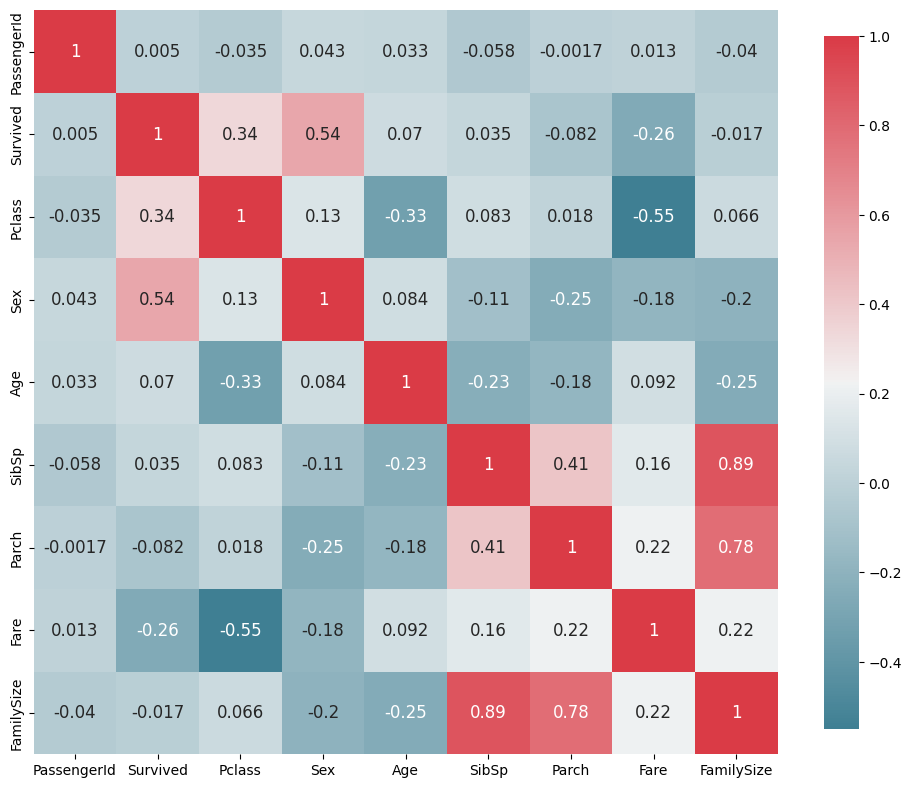

In [11]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(df)

#